In [1]:
import jax
import numpyro
import numpyro.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from numpyro.infer import MCMC
from numpyro.infer.hop import Hop

In [2]:
def normal(D=2, mu=0, sigma=1):
    with numpyro.plate('D', D):
        theta = numpyro.sample('theta', dist.Normal(mu, sigma))

In [3]:
lam = 5.0
kernel = Hop(normal, lam=lam, mu=np.sqrt(0.5 * lam))
mcmc = MCMC(kernel, num_warmup=0, num_samples=2500, num_chains=1)

rng_key = jax.random.PRNGKey(0)
mcmc.run(rng_key, D=2, mu=1, sigma=1, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 2500/2500 [00:01<00:00, 1725.07it/s]


In [4]:
mcmc.print_summary()
samples = mcmc.get_samples()
samples


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]      1.01      1.26      1.05     -1.12      3.06    531.01      1.00
  theta[1]      0.98      1.32      0.93     -1.09      3.45    429.37      1.00



{'theta': DeviceArray([[ 0.01389408, -0.07797861],
              [ 0.01389408, -0.07797861],
              [ 0.01389408, -0.07797861],
              ...,
              [-1.1133246 ,  0.984254  ],
              [-0.32217157,  0.14999789],
              [-0.32217157,  0.14999789]], dtype=float32)}

In [5]:
x = np.array([1,2])
np.outer(x,x)

array([[1, 2],
       [2, 4]])

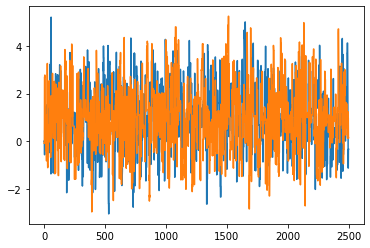

In [6]:
plt.plot(samples["theta"])

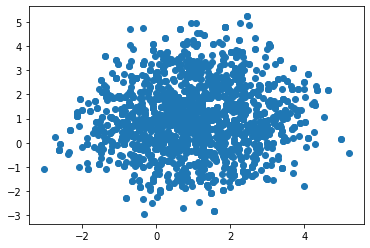

In [7]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

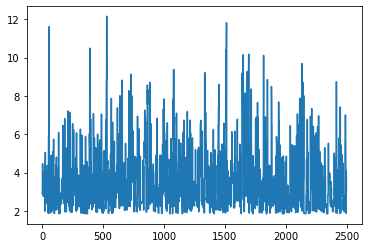

In [8]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

DeviceArray(0.4925541, dtype=float32)

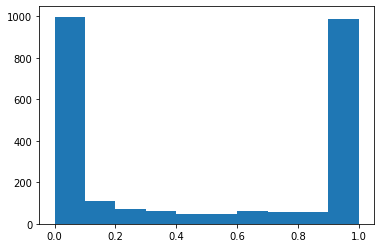

In [9]:
plt.hist(ap)
np.mean(ap)

# Diagonal

In [10]:
sig = np.array([1, 5])

kernel = Hop(normal, lam=lam, mu=np.sqrt(0.5 * lam), covar=np.diag(sig**2))
mcmc = MCMC(kernel, num_warmup=0, num_samples=1000, num_chains=1)
mcmc.run(rng_key, D=2, mu=0, sigma=sig, extra_fields=('potential_energy','accept_prob'))

sample: 100%|██████████| 1000/1000 [00:01<00:00, 965.29it/s]


In [11]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  theta[0]     -0.02      1.54      0.08     -2.83      2.31    243.22      1.00
  theta[1]     -0.67      3.33     -0.23     -7.58      3.59     35.93      1.00



In [12]:
samples = mcmc.get_samples()
samples

{'theta': DeviceArray([[-2.321604  , -2.2799323 ],
              [-2.321604  , -2.2799323 ],
              [ 0.62728167, -2.022736  ],
              ...,
              [-2.7375    ,  1.1071101 ],
              [-2.8169491 ,  2.3074408 ],
              [-3.032195  ,  3.069418  ]], dtype=float32)}

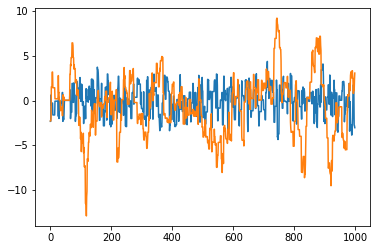

In [13]:
plt.plot(samples["theta"])

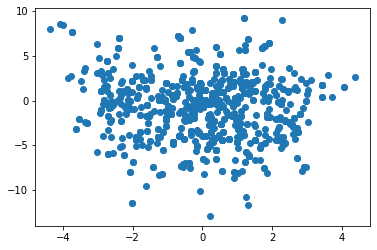

In [14]:
plt.scatter(x=samples["theta"][:,0], y=samples["theta"][:,1])

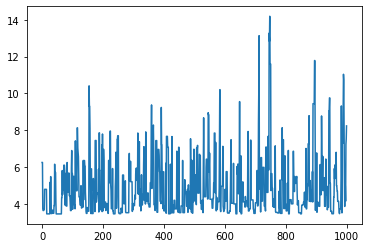

In [15]:
pe, ap = [mcmc.get_extra_fields()[k] for k in ('potential_energy','accept_prob')]
plt.plot(pe)

DeviceArray(0.48718616, dtype=float32)

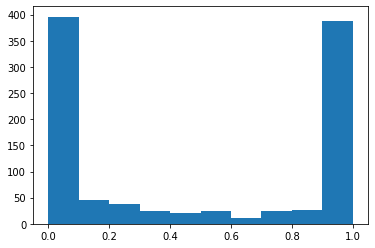

In [16]:
plt.hist(ap)
np.mean(ap)